In [30]:
#IMPORTING THE REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams["figure.dpi"]=400
np.random.seed(seed=24)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
%matplotlib inline

In [2]:
#READING THE DATASET
df=pd.read_excel("credit_card_clients.xls")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
#COUNTING NUMBER OF COLUMNS
print(len(df.columns))
print(df.columns)

25
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [4]:
#CHECKING NUMBER OF UNIQUE ID
df["ID"].nunique()

29687

In [5]:
#CHECKING SHAPE OF DATASET
df.shape

(30000, 25)

### We can observe from above that there are only 29687 unique ID while there are 30000 rows which shows that some of the unique ID have been repeated.

In [6]:
#OCCURRENCE OF UNIQUE ID
id_counts=df["ID"].value_counts()
id_counts.head()

315e4f9d-2b0b    2
27e04c06-487f    2
91c69d1a-8732    2
c361e43d-f1f4    2
4f95b36b-ab10    2
Name: ID, dtype: int64

In [7]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

### From the above observation we can see that an ID has not been repeated more than twice

In [9]:
#USING BOOLEAN MASK
dupe_mask= id_counts==2
dupe_mask[0:5]

315e4f9d-2b0b    True
27e04c06-487f    True
91c69d1a-8732    True
c361e43d-f1f4    True
4f95b36b-ab10    True
Name: ID, dtype: bool

In [10]:
#GETTING ID WHICH HAVE BEEN REPEATED
dupe_ids=id_counts.index[dupe_mask]
dupe_ids=list(dupe_ids)
len(dupe_ids)

313

In [16]:
dupe_ids[0:5]

['315e4f9d-2b0b',
 '27e04c06-487f',
 '91c69d1a-8732',
 'c361e43d-f1f4',
 '4f95b36b-ab10']

In [17]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10) 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
12769,91c69d1a-8732,70000,2,2,2,22,0,-1,0,0,0,0,9232,68209,66087,50716,48862,49850,68209,2081,2000,2000,1828,1518,0
12869,91c69d1a-8732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17523,27e04c06-487f,200000,2,2,1,37,1,2,0,0,0,0,7841,7569,9282,10155,12470,13571,0,2000,1155,2470,1265,0,0
17623,27e04c06-487f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17696,315e4f9d-2b0b,210000,2,2,2,41,0,0,0,0,0,0,165425,169174,171459,177590,180147,184084,8000,6500,9000,7000,7000,7000,0
17796,315e4f9d-2b0b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df_zero_mask= df==0
feature_zero_mask= df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)

315

In [19]:
df_clean_1=df.loc[~feature_zero_mask,:].copy()
df_clean_1.shape

(29685, 25)

In [20]:
df_clean_1["ID"].nunique()

29685

In [22]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
ID                            29685 non-null object
LIMIT_BAL                     29685 non-null int64
SEX                           29685 non-null int64
EDUCATION                     29685 non-null int64
MARRIAGE                      29685 non-null int64
AGE                           29685 non-null int64
PAY_1                         29685 non-null object
PAY_2                         29685 non-null int64
PAY_3                         29685 non-null int64
PAY_4                         29685 non-null int64
PAY_5                         29685 non-null int64
PAY_6                         29685 non-null int64
BILL_AMT1                     29685 non-null int64
BILL_AMT2                     29685 non-null int64
BILL_AMT3                     29685 non-null int64
BILL_AMT4                     29685 non-null int64
BILL_AMT5                     29685 non-null int64
BILL_AMT6             

In [23]:
df_clean_1["PAY_1"].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [25]:
df_clean_1["PAY_1"].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [26]:
#REMOVING ALL ROWS WITH MISSING DATA
valid_pay_1_mask=df_clean_1["PAY_1"]!="Not available"
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [27]:
sum(valid_pay_1_mask)

26664

In [28]:
df_clean_2=df_clean_1.loc[valid_pay_1_mask,:].copy()
df_clean_2.shape

(26664, 25)

In [29]:
#Converting PAY_1 from object datatype to int64
df_clean_2["PAY_1"]=df_clean_2["PAY_1"].astype("int64")
df_clean_2[["PAY_1","PAY_2"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
PAY_1    26664 non-null int64
PAY_2    26664 non-null int64
dtypes: int64(2)
memory usage: 624.9 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002794A9C92C8>,
      dtype=object)

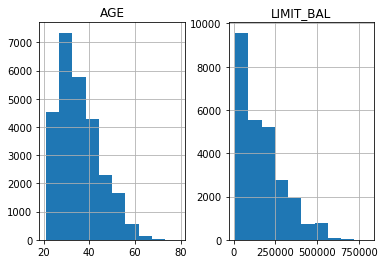

In [31]:
df_clean_2[["LIMIT_BAL","AGE"]].hist()

In [32]:
df_clean_2[["LIMIT_BAL","AGE"]].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [33]:
df_clean_2["EDUCATION"].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

### We have been only provided with (1 = graduate school; 2 = university; 3 = high school; 4 = others) so we will also lump 0,5,6 in the others category

In [35]:
df_clean_2["EDUCATION"].replace(to_replace=[0,5,6],value=4,inplace=True)
df_clean_2["EDUCATION"].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [36]:
df_clean_2["MARRIAGE"].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [37]:
df_clean_2["MARRIAGE"].replace(to_replace=[0],value=3,inplace=True)
df_clean_2["MARRIAGE"].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Text(0, 0.5, 'Default Rate')

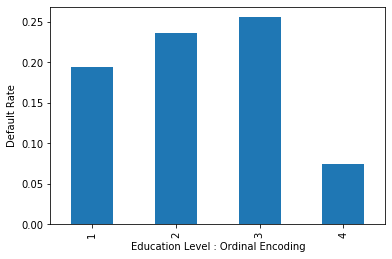

In [38]:
df_clean_2.groupby("EDUCATION").agg({"default payment next month":"mean"}).plot.bar(legend=False)
plt.xlabel("Education Level : Ordinal Encoding")
plt.ylabel("Default Rate")

### Implementing One-Hot Encoding for Categorical Features

In [39]:
df_clean_2["EDUCATION_CAT"]="none"
df_clean_2[["EDUCATION","EDUCATION_CAT"]].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [41]:
cat_mapping={1:"graduate school",2:"university",3:"high school",4:"others"}
df_clean_2["EDUCATION_CAT"]=df_clean_2["EDUCATION"].map(cat_mapping)
df_clean_2[["EDUCATION","EDUCATION_CAT"]].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [43]:
edu_ohe=pd.get_dummies(df_clean_2["EDUCATION_CAT"])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [44]:
df_with_ohe=pd.concat([df_clean_2,edu_ohe],axis=1)
df_with_ohe[["EDUCATION_CAT","graduate school","high school","university","others"]].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [45]:
df_with_ohe.to_csv("cleaned_data.csv",index=False)